# Module Circuit

This document describes the **circuit** module that can be used to solve electronica circuits.

The main element in the module is the **circuit class**

The module relies on [sympy](http://www.sympy.org) to perform the calculations.


# Importing the module

In order to use the module,you need to **load** and **import** it. 

The following code loads and imports the **circuit** module in the **Colaboratory** environment. Outside of Colaboratory just use the usual import method.

The code clears the output text after import showing only the loaded linear module version.

We will also load the **linear** module because we need later to draw bode plots.

In [1]:
# Set True inside colaboratory, False elsewere
colaboratory = True

if colaboratory:
    # Load the circuit module
    !rm circuit.*
    !wget https://raw.githubusercontent.com/R6500/Python-bits/master/Modules/circuit.py 
    
    # Load the linear module
    !rm linear.*
    !wget https://raw.githubusercontent.com/R6500/Python-bits/master/Modules/linear.py
    
# Import the modules
import circuit
import linear as lin

# Set colaboratory if needed on linear
lin.setColaboratory(colaboratory)

# Erase output after import
from IPython.display import clear_output
clear_output()

# Check loaded module
try:
    print('circuit version: ',circuit.version)
    print('linear version:  ',lin.version)
except:
    print('Error loading module')
    raise

circuit version:  28/03/2018-B
linear version:   22/03/2018


## The Circuit Class

The circuit class defines a circuit

To create an instance of the class, assuming you use the normal import, just use:

>`object = circuit.circuit()`

The circuits are defined by a set of **nodes** you can name the nodes as you want using strings or numbers. Although the usual way is to use numbers.

Every circuit, however, must have a node with named **0**. Not having this node in a circuit generates an exception.

## Adding components to a circuit

Components can be added using the **add\*** member functions

`object.addR(self,name,node1,node2,value=None)`

>Add a resistor to the circuit between **node1** and **node2**.  
>You can optionally provide a numeric value, in ohm, for the resistor.

`object.addC(self,name,node1,node2,value=None)`

>Add a capacitor to the circuit between **node1** and **node2**.  
>You can optionally provide a numeric value, in Farad, for the capacitor.

`object.addL(self,name,node1,node2,value=None)`

>Add an inductor to the circuit between **node1** and **node2**.  
>You can optionally provide a numeric value, in Henry, for the inductor.

`object.addV(self,name,node1,node2,value=None)`

>Add a voltage source to the circuit between **node1** (+) and **node2** (-).  
>You can optionally provide a numeric value, in Volt, for the source.

`object.addI(self,name,node1,node2,value=None)`

>Add a current source to the circuit between **node1** (+) and **node2** (-).  
>The current is defined to go from **node2** (-) to **node1** (+)  
>You can optionally provide a numeric value, in Volt, for the source.

`object.addVM(self,name,node1,node2)`

>Add a voltage measurement component between **node1** (+) and **node2** (-)  
>This component just measures a voltage and doesn't change the circuit operation.  
>It can be used to give its voltage in the circuit solution.  
>This component can also be used to control a controlled source.

`object.addIM(self,name,node1,node2)`

>Add a current measurement component between **node1** (+) and **node2** (-)  
>This component just measures a current and doesn't change the circuit operation.  
>The two nodes are short circuited by this component.  
>The component can be used to give its currents in the circuit solution.  
>This component can also be used to control a controlled source.

`object.addCVS(self,name,node1,node2,cont,value=None)`

>Add a controlled voltage source between **node1** (+) and **node2** (-)  
>Voltage is proportional to the a voltage or current measurement  
>The proportionality constant is defined by **name**  
>**cont** is the name of a previously defined voltage or current measurement component  

`object.addCIS(self,name,node1,node2,cont,value=None)`

>Add a controlled current source between **node1** (+) and **node2** (-)  
>The current is defined to go from **node2** (-) to **node1** (+)  
>Current is proportional to the a voltage or current measurement  
>The proportionality constant is defined by **name**  
>**cont** is the name of a previously defined voltage or current measurement component 

All the above methods return a **sympy** symbol associated to the added component that is generated from the name provided.

In the case of the voltage sources, independent (addV) or controlled (addCVS), the current going out of the source is also associated to a symbol, but this one is not returned by the functions.

## Circuit symbol names

Every component you include in a circuit adds a **symbol name**

For instance, adding a resistor with:

>`object.addR('R1',1,0,1000)`

Adds the name **'R1'** to the listo of symbols of the circuit. As explained before, those symbols are returned by the **add\*** methods.

Aside from the names or each component you add, the module adds other additional symbols:
<BR>

* Every voltage source gets a symbol associated to its current going from terminal (-) to (+)

>The simbol name is the same name of the source with a **i** prefix. For instance:

>`object.addV('Vs',1,0,1)`

>Adds the **Vs** and the **iVs** symbols

>This also applies to controlled voltage sources

<BR>

* Every node that is not ground **0** gets a symbol for its voltage

>The simbol name is the same name of the node with a **v** prefix. For instance:

>`object.addR('R1',1,2,1000)`

>Adds the **R1**, **v1** and **v2** symbols

<BR>
  
The circuit solution always includes the names of the components associated to the voltage and current **measurement** components.


Other symbols can also be found in the circuit solutions as you will always get as many solution symbols as independent variables are in the circuit.

All symbols for the circuit can be obtained from the **symbols** member of the class as will be explained later.

## Solving a circuit

A circuit can be solved using the **solve** method

>`object.solve()`

This function retuns the circuit solution as a **dictionary** that uses the **symbol names** as keys. This dictionary is also available as the object member **solution**

>`object.solution`

Once you have solved a circuit, the object associated to it also holds the particular solution in the **particular** member. This particular solution is obtained by subtituting all component **symbols** by their defined **values**.

>`object.particular`


## Additional circuit elements

The **circuit** object has some additional member elements a part from **solution** and **particular** that can come handy in some calculations

<BR>

`object.sSolution`

**Dictionary** of circuit solutions using sympy **symbols** for keys instead of **names**

<BR>

`object.symbol`

**Dictionary** of all **sympy** circuit symbols using **names** for keys

<BR>

`object.equations`

**List** of all **equations** used to solve the circuit

<BR>

`object.unknowns`

**List** of all **unknowns** sympy symbols for which we solve the circuit

<BR><BR>
There are other member elements that are not normaly useful to access from outside the module internal operations
  
<BR>

`object.components`

List of components in the circuit. Each component is defined as a **dictionary**

<BR>

`object.meas`

**Dictionary** of voltage and current measurement components using **names** for keys

<BR>

`object.subsDic`

Substitution **dictionary** for component **values** using **symbols** for keys

<BR>

`object.name`

Symbol **dictionary** with all **names** that can become unknowns using **symbols** for keys

## Evaluation helper functions

The **circuit** module includes three helper functions to evaluate a **sympy** expression for several values of one of its symbols.

The **expr2func** function generates a python function from a **sympy** expression

>`expr2func(expr,sym1,sym2,...)`

Parameters:

>**expre** is the expression to convert

>**sym1,sym2,...** is a list of symbols to convert to function parameters

**Example** of usage:

In [2]:
import sympy
x,y = sympy.symbols('x,y')
expr = 2*x*y
f = circuit.expr2func(expr,x,y)
print('f(2,4) =',f(2,4))

f(2,4) = 16


The **evalList** functions evaluates a **sympy** expression in a set of values

>`evalList(expr,var,set)`

Parameters:

>**expr** is the expression to evaluate

>**var** is the sympy symbol to substituye for a set of values

>**set** is an iterable set of values

The function returns a **numpy** array

One of the uses of the evaluation is to calculate the frequency response of a circuit, the **evalFrequs** enables us to evaluate one **sympy** expression for several frequency **f** values.

>`evalFreqs(expr,set)`

Parameters:

>**expr** is the expression to evaluate

>**set** is an iterable set of frequencies (in Hz)

The function returns a **numpy** array of complex numbers that evaluates the using the following assignment for the **s** symbol

$\qquad s = j \: 2\pi f$

for each frequency of the **set** iterable.

The function is specially usefull for bode plots using the **linear** module:

> `f_vector = linear.frange(f_start,f_end)`  
> `res = evalFreqs(expr,f_vector)`  
> `linear.drawBodeFromComplex(f_vector,res)`

## $\LaTeX$ support

The module supports **latex** for the equations generated by the code when working inside the **Jupyter** environment.

It doesn't work, however, in colaboratory.

Latex is disabled by default, to enable latex suppor execute the module **setLatex** function:

>`setLatex(flag=True)`

Where **flag** indicates if we want to enable Latex (defaults to True)

Once enabled, you can use the show command to show equations in latex:

>`show(expr)`

If **latex** is not enabled, **show** just uses a normal print


## The verbose option

By default the module does not write anything on the standard output.

You can, however, set the module to be verbose on its operation.

The **setVerbose()** function controls the information given on standard output

>`setVerbose(flag)`

Where **flag** activates output text when **True** and deactivates it when **False**

By default, flag is **True**, so **setVerbose()** without arguments activate text output.

# Examples

The following section shows some circuit examples

## First simple DC circuit

The following circuit includes one voltage source, one current source and two resistors.

The output voltage **Vo** will be defined with a voltage measurement component.

![Circuit 01](https://raw.githubusercontent.com/R6500/Python-bits/master/Colaboratory/Artwork/MC_01.png)

The following code describes the circuit.

We will use the **verbose** option that gives information about the module actions.

In [3]:
# Set verbose option
circuit.setVerbose()

# Circuit 1 definiton
c1 = circuit.circuit()
c1.addV('Vs',1,0,5)
c1.addR('R1',1,2,1000)
c1.addR('R2',2,0,1000)
c1.addI('Is',2,0,0.01)
c1.addVM('Vo',2,0)

Starting a new circuit
Voltage supply Vs added between nodes 1 and 0 with value 5
Resistor R1 added between nodes 1 and 2 with value 1000
Resistor R2 added between nodes 2 and 0 with value 1000
Current supply Is added between nodes 2 and 0 with value 0.01
Voltage measurement Vo added between nodes 2 and 0


Vo

Now we can solve the circuit:

In [4]:
c1.solve()

Solving the circuit
There are 3 nodes :
     0
     1
     2
Creating node variables
     v1
     v2
Creating KCL equations
     iVs - (v1 - v2)/R1
     Is - v2/R2 - (-v1 + v2)/R1
Adding V source equations
Adding I measurement equations
Adding V measurement equations
Processing controlled elements
Circuit equations:
     iVs - (-Vo + v1)/R1
     Is - Vo/R2 - (Vo - v1)/R1
     Eq(Vs, v1)
Unknowns: {iVs, Vo, v1}
Circuit solution:
     {'iVs': (-Is*R2 + Vs)/(R1 + R2), 'Vo': R2*(Is*R1 + Vs)/(R1 + R2), 'v1': Vs}
Circuit solution with substitutions:
     {'iVs': -0.00250000000000000, 'Vo': 7.50000000000000, 'v1': 5}


{'Vo': R2*(Is*R1 + Vs)/(R1 + R2), 'iVs': (-Is*R2 + Vs)/(R1 + R2), 'v1': Vs}

All the text, except the last line that is the output of `c1.solve()` is generated due to the **verbose** setting.

You can get the variables in the circuit solutions using the code:

In [5]:
# Show the list of solution symbols
print(list(c1.solution))

['iVs', 'Vo', 'v1']


As you can see, the **Vo** measurement element is included in the solution. In this circuit, the current in the voltage source **iVs** and node 1 voltage **v1** are also one of the solutions. 

You can get one of the circuit solutions by its name, both in the **symbolic** and the **numerical** cases:

In [6]:
# Symbolic solution
print('Vo =',c1.solution['Vo'],'  (Symbolic)')

# Numeric solution
print('Vo =',c1.particular['Vo'],'V   (Particular)')

Vo = R2*(Is*R1 + Vs)/(R1 + R2)   (Symbolic)
Vo = 7.50000000000000 V   (Particular)


## Second simple DC circuit

The following circuit includes one voltage source, one current source and two resistors.

The output voltage **Vo** will be defined with a voltage measurement component.

![Circuit 02](https://raw.githubusercontent.com/R6500/Python-bits/master/Colaboratory/Artwork/MC_02.png)

From now on, we will disable the **verbose** option.

The following code describes the circuit and solves it.

In [7]:
# Disable the verbose option
circuit.setVerbose(False)

# Circuit 2 definition
c2 = circuit.circuit()
c2.addV('Vs',1,0,6)
c2.addR('R1',1,2,1000)
c2.addR('R2',2,3,1000)
c2.addR('R3',3,0,1000)
c2.addVM('Vo',2,3)
c2.solve()

{'Vo': R2*Vs/(R1 + R2 + R3),
 'iVs': Vs/(R1 + R2 + R3),
 'v1': Vs,
 'v2': Vs*(R2 + R3)/(R1 + R2 + R3),
 'v3': R3*Vs/(R1 + R2 + R3)}

The last command returns the shown circuit solution. As in the previous circuit you can get the **Vo** value:

In [8]:
# Symbolic solution
print('Vo =',c2.solution['Vo'],'  (Symbolic)')

# Numeric solution
print('Vo =',c2.particular['Vo'],'V   (Particular)')

Vo = R2*Vs/(R1 + R2 + R3)   (Symbolic)
Vo = 2 V   (Particular)


If we want, we can see the circuit equations. If **Eq** is present, it identifies the two sides of the equation.  
One side equations, **without Eq**, shall equal zero.

We can also see the unknowns for which we solve the circuit.

In [9]:
# Equations
print('Circuit equations')
for eq in c2.equations:
    print('   ',eq)
print()

# Unknowns
print('Circuit unknowns for wich we solve')
print('   ',c2.unknowns)

Circuit equations
    iVs - (v1 - v2)/R1
    -(v2 - v3)/R2 - (-v1 + v2)/R1
    -v3/R3 - (-v2 + v3)/R2
    Eq(Vs, v1)
    Eq(Vo, v2 - v3)

Circuit unknowns for wich we solve
    {v1, iVs, v3, v2, Vo}


## Current measurement

The following circuit includes current measurement elements

![Circuit 03](https://raw.githubusercontent.com/R6500/Python-bits/master/Colaboratory/Artwork/MC_03.png)

Note that, although, nodes 2, 3 and 4 are really at the same voltage, we need to use three different numbers to define the currents.

The following code defines and solves the circuit.

In [10]:
# Circuit 3 definition

c3 = circuit.circuit()
c3.addV('Vs',1,0,5)
c3.addR('R1',1,2,1000)
c3.addR('R2',3,0,2000)
c3.addR('R3',4,0,2000)
c3.addIM('I1',3,2)
c3.addIM('I2',4,2)
c3.solve()

{'I1': R3*Vs/(R1*R2 + R1*R3 + R2*R3),
 'I2': R2*Vs/(R1*R2 + R1*R3 + R2*R3),
 'iVs': Vs*(R2 + R3)/(R1*R2 + R1*R3 + R2*R3),
 'v1': Vs,
 'v2': R2*R3*Vs/(R1*R2 + R1*R3 + R2*R3)}

We can show the two desired solutions:

In [11]:
print('I1 =',c3.solution['I1'])
print('I2 =',c3.solution['I2'])

I1 = R3*Vs/(R1*R2 + R1*R3 + R2*R3)
I2 = R2*Vs/(R1*R2 + R1*R3 + R2*R3)


We can ask for the unknowns in the circuit:

In [12]:
print('Unknowns:',c3.unknowns)

Unknowns: {v1, iVs, I1, v2, I2}


You can see that although we defined nodes 1, 2, 3 and 4, only node voltages **v1** and **v2** are present in the list.

Nodes 3 and 4 have been substituted by node 2 voltage.

This is seen more clearly in the list of equations:

In [13]:
# Equations
print('Circuit equations')
for eq in c3.equations:
    print('   ',eq)
print()

Circuit equations
    iVs - (v1 - v2)/R1
    -I1 - I2 - (-v1 + v2)/R1
    I1 - v2/R2
    I2 - v2/R3
    Eq(Vs, v1)



## Controlled voltage source

The following circuit includes voltage controlled source

![Circuit 04](https://raw.githubusercontent.com/R6500/Python-bits/master/Colaboratory/Artwork/MC_04.png)

The following code defines and solves the circuit.

In [14]:
# Circuit 4 definition
c = circuit.circuit()
c.addV('Vs',1,0,5)
c.addR('R1',1,2,1000)
c.addR('R2',2,0,1000)
c.addVM('Vm',2,0)
c.addCVS('k',3,0,'Vm',10)
c.addR('R3',3,0)
c.addVM('Vo',3,0)
c.solve()

{'Vm': R2*Vs/(R1 + R2),
 'Vo': R2*Vs*k/(R1 + R2),
 'iVs': Vs/(R1 + R2),
 'ik': R2*Vs*k/(R3*(R1 + R2)),
 'v1': Vs}

## Controlled current source

The following circuit includes a current controlled source

![Circuit 05](https://raw.githubusercontent.com/R6500/Python-bits/master/Colaboratory/Artwork/MC_05.png)

The following code defines and solves the circuit.

In [15]:
# Circuit 5 definition
c5 = circuit.circuit()
c5.addV('Vs',1,0,5)
c5.addR('R1',1,2,1000)
c5.addIM('Im',0,2)
c5.addCIS('beta',3,0,'Im',10)
c5.addR('R3',3,0)
c5.addVM('Vo',3,0)
c5.solve()

{'Im': Vs/R1, 'Vo': R3*Vs*beta/R1, 'iVs': Vs/R1, 'v1': Vs}

## AC Circuit

Now we can try an AC circuit

![Circuit 02](https://raw.githubusercontent.com/R6500/Python-bits/master/Colaboratory/Artwork/Circuit02.png)

The following code describes and solves the circuit

In [16]:
# Circuit 6 definition
c6 = circuit.circuit()
c6.addV('Vs',1,0,1)
c6.addR('R1',1,2,1000)
c6.addR('R3',2,3,100)
c6.addC('C1',2,0,1e-6)
c6.addC('C2',3,0,100e-9)
c6.addVM('Vo',3,0)
c6.solve()

{'Vo': Vs/(C1*R1*s + C2*s*(C1*R1*R3*s + R1 + R3) + 1),
 'iVs': Vs*s*(C1*C2*R3*s + C1 + C2)/(C1*C2*R1*R3*s**2 + C1*R1*s + C2*R1*s + C2*R3*s + 1),
 'v1': Vs,
 'v2': Vs*(C2*R3*s + 1)/(C1*R1*s + C2*s*(C1*R1*R3*s + R1 + R3) + 1)}

The **Vo** solution both in symbolic and particular form is:

In [17]:
print('Vo =',c6.solution['Vo'])
print('Vo =',c6.particular['Vo'])

Vo = Vs/(C1*R1*s + C2*s*(C1*R1*R3*s + R1 + R3) + 1)
Vo = 1/(1.0e-7*s*(0.1*s + 1100) + 0.001*s + 1)


Now we can also get the **poles** and **zeros** of the circuit using the **sympy** functions

In [18]:
import sympy

numer,denom =c6.particular['Vo'].as_numer_denom()
print('Num =',numer)
print('Den =',denom)
print()

zeros = sympy.roots(numer)
poles = sympy.roots(denom)
print('Zeros =',zeros)
print('Poles =',poles)
print()

Num = 1
Den = 1.0e-7*s*(0.1*s + 1100) + 0.001*s + 1

Zeros = {}
Poles = {-110091.666030631: 1, -908.333969368548: 1}



Now we can use the **linear** module, imported as **lin** to show a bode plot

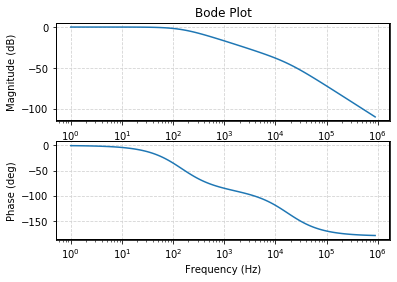

In [19]:
# Get the circuit output Vo
Vo  = c6.particular['Vo']

# Define a frequency vector between 1Hz and 1MHz
fv  = lin.frange(1,1e6)

# Evaluate Vo at all frequencies
res = circuit.evalFreqs(Vo,fv)

# Draw the bode plot
lin.drawBodeFromComplex(fv,res)

## AC Resonant Circuit

We can also solve an AC resonant circuit with a capacitor and an inductor

![Circuit 07](https://raw.githubusercontent.com/R6500/Python-bits/master/Colaboratory/Artwork/MC_07.png)

The following code describes and solves the circuit

In [20]:
# Circuit 7 definition
c7 = circuit.circuit()
c7.addI('Is',1,0,1)
c7.addC('C',1,0,1e-6)
c7.addL('L',1,0,1e-3)
c7.addVM('Vo',1,0)
c7.solve()

{'Vo': Is*L*s/(C*L*s**2 + 1)}

We can also find the **poles** and **zeros**

The circuit is band pass as it has a zero at 0 and two complex poles

Q is infinite as it has no resistive elements

In [21]:
import sympy

numer,denom =c7.particular['Vo'].as_numer_denom()
print('Num =',numer)
print('Den =',denom)
print()

zeros = sympy.roots(numer)
poles = sympy.roots(denom)
print('Zeros =',zeros)
print('Poles =',poles)

Num = 0.001*s
Den = 1.0e-9*s**2 + 1

Zeros = {0: 1}
Poles = {-31622.7766016838*I: 1, 31622.7766016838*I: 1}


A more realistic circuit will have also a resistance

In [22]:
c7.addR('R',1,0,1e6)
c7.solve()

numer,denom =c7.particular['Vo'].as_numer_denom()
print('Num =',numer)
print('Den =',denom)
print()

zeros = sympy.roots(numer)
poles = sympy.roots(denom)
print('Zeros =',zeros)
print('Poles =',poles)

Num = 1000.0*s
Den = 0.001*s**2 + 0.001*s + 1000000.0

Zeros = {0: 1}
Poles = {-0.5 - 31622.7765977309*I: 1, -0.5 + 31622.7765977309*I: 1}


We can also draw the bode plot for this circuit

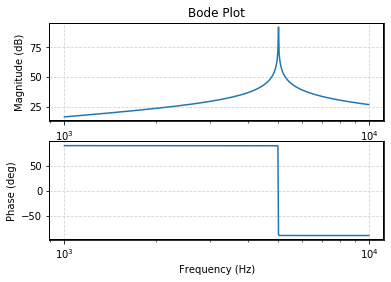

In [23]:
Vo  = c7.particular['Vo']
fv  = lin.frange(1000,10000,ppd=500)
res = circuit.evalFreqs(Vo,fv)
lin.drawBodeFromComplex(fv,res)

## Thevenin equivalent

We can use the module also to obtain a thevenin equivalent

![Circuit 08](https://raw.githubusercontent.com/R6500/Python-bits/master/Colaboratory/Artwork/MC_08.png)

As we know, the open circuit **Vo** is the thevenin voltage **Vth**

In [24]:
# Circuit definition
c8 = circuit.circuit()
c8.addV('Vs',1,0,5)
c8.addR('R',1,2,1000)
c8.addIM('I1',3,2)
c8.addCIS('beta',3,0,'I1',100)
c8.addVM('Vo',3,0)
c8.solve()

# Thevenin voltage
Vth = c8.solution['Vo']
print('Vth =',Vth)

Vth = Vs


The thevenin resistance **Rth** can be calculating adding a **Vx** voltage on the output and obtaining the resistance as:

$\qquad R_{th} = \left. \frac{Vx}{Ix} \right|_{V_s = 0}$

Where $Ix$ is the current output in the $Vx$ source.

The following **code** calculates **Rth**

In [25]:
# Thevenin resistance calculation

# Add Vx output source 
# Beware: If you modify this cell
# Don't execute this cell two times before executing the previous cell
# or you will get several Vx voltage sources in the circuit
c8.addV('Vx',3,0)

# Solve the circuit
c8.solve()

# Show the Ix solution that is named iVx
Ix = c8.solution['iVx']
print('Ix =',Ix)

# We get the 'Vx' symbol form the nDic dictionary
Vx = c8.symbol['Vx']

# We susbtitute Vs for 0 in the Ix solution
Ix = Ix.subs('Vs',0)

# Calculate and show Rth value
Rth = c8.symbol['Vx'] / c8.solution['iVx'].subs('Vs',0)
print('Rth =',Rth)

Ix = (-Vs + Vx)*(beta + 1)/R
Rth = R/(beta + 1)


## Opamp circuit

We can also solve operational amplifier circuits

![Circuit 09](https://raw.githubusercontent.com/R6500/Python-bits/master/Colaboratory/Artwork/MC_09.png)

One way is to define the amplifier as a controlled voltage source:


$\qquad V_d = V_{(+)}-V_{(-)} \qquad V_O = A \cdot V_d$

Once we solve the circuit we can obtain three posible solutions:

**Finite gain Opamp**  
In this case we just use the default solution with the **A** value for the opamp.

**Ideal Opamp**  
To obtain the ideal opamp solution we obtain the circuit solution when A tends to infinity.

$\qquad V_O = \left. V_O \right|_{A \rightarrow \infty}$


**Dominant pole Opamp**  
In this case we substitute **A** for **A(s)** using the dominant pole model

$\qquad A = A(s) = \frac{A_O}{1+s/p1}$

The following code solves the above circuit considering the finite gain model.

In [26]:
# Circuit definition
c9 = circuit.circuit()
c9.addV('Vs',1,0,1)       # Vs value is 1 so that Vo gives gain
c9.addR('Ri',1,2,1000)
c9.addR('Rf',2,3,10000)
c9.addVM('Vo',3,0)
# Opamp base model
c9.addVM('Vd',0,2)
c9.addCVS('A',3,0,'Vd')
c9.solve()

# Base solution with finite gain A
Vo_A = c9.solution['Vo']
print('Finite gain opamp solution')
print('  Vo =',Vo_A)

Finite gain opamp solution
  Vo = -A*Rf*Vs/(A*Ri + Rf + Ri)


If use the **limit** function of the **sympy** module, we can obtain the ideal opamp response

In [27]:
# Import the limit function and the infinite symbol
from sympy import oo, limit

# Get the circuit 'A' symbol
A = c9.symbol['A']

# Calculate the limit of the solution when A->oo
Vo_i = limit(Vo_A,A,oo)
print('Ideal opamp solution')
print('  Vo =',Vo_i)

Ideal opamp solution
  Vo = -Rf*Vs/Ri


The solution for an opamp with a **dominant** pole model can be obtained using the **subs** method to substituye the gain **A** for a a single pole model

In [28]:
import sympy

# New symbols for s, Ao and p1
s,Ao,p1 = sympy.symbols('s,Ao,p1')

# Define A(s) and substitute A for A(s) 
# simplify(), expand() and collect() give a better expression
A_s = Ao*p1/(s+p1)
Vo_d = (Vo_A.subs(A,A_s)).simplify().expand()
Vo_d = sympy.collect(Vo_d,s)

print('Dominant pole solution')
print('  Vo =',Vo_d)

Dominant pole solution
  Vo = -Ao*Rf*Vs*p1/(Ao*Ri*p1 + Rf*p1 + Ri*p1 + s*(Rf + Ri))


We can use the values of the components to draw the bode plot of the circuit

Numerical solution in s domain
    -16000000/(11*s + 1600176)



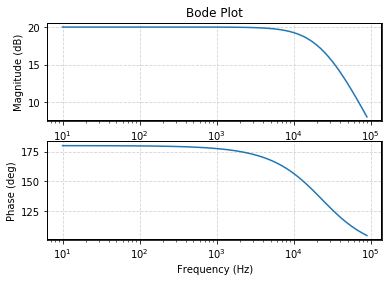

In [29]:
# Get the Vo solution with component values
Vo_d=c9.particular['Vo']

# Define values for the dominant pole model
p1 = 16 # rad/s
Ao = 100000

# Substitute A for the dominant pole model
Vo_d = (Vo_d.subs(A,Ao*p1/(s+p1))).simplify()

print('Numerical solution in s domain')
print('   ',Vo_d)
print()

# Bode plot
fv  = lin.frange(10,100000)
res = circuit.evalFreqs(Vo_d,fv)
lin.drawBodeFromComplex(fv,res)

The bode plot shows the signal gain because the numeric **value** of the input **Vs** was 1.

We cab compute the signal gain in the symbolic solution dividing **Vo** by **Vs**

In [30]:
# Gain calculation
Gain = Vo_A/c9.symbol['Vs']

print('Signal gain')
print('  ',Gain)
print()

print('Signal gain for A -> oo')
print('  ',limit(Gain,c9.symbol['A'],oo))

Signal gain
   -A*Rf/(A*Ri + Rf + Ri)

Signal gain for A -> oo
   -Rf/Ri


We can also compute the **noise gain $N_G$**

This gain is the one associated to the **GBW** product conservation in dominant pole opamp circuits.

The noise gain can be calculated as the gain for a **$V_n$** source in series with the **(+)** terminal when the input **$V_s$** is zero.

<BR>
$\qquad N_G = \left. \frac{V_O}{V_n} \right|_{Vs = 0}$
<BR>

We will rewrite the circut to measure this noise gain.

In [31]:
# Noise gain Circuit definition
c9b = circuit.circuit()
c9b.addR('Ri',0,2,1000)
c9b.addR('Rf',2,3,10000)
c9b.addV('Vn',4,0)
c9b.addVM('Vo',3,0)
# Opamp base model
c9b.addVM('Vd',4,2)
c9b.addCVS('A',3,0,'Vd')
c9b.solve()

# The noise gain is calculated
Ng = c9b.solution['Vo']/c9b.symbol['Vn']

print('Noise gain')
print('  ',Ng)
print()

print('Noise gain for A -> oo')
print('  ',limit(Ng,c9b.symbol['A'],oo))

Noise gain
   A*(Rf + Ri)/(A*Ri + Rf + Ri)

Noise gain for A -> oo
   (Rf + Ri)/Ri


<BR><BR><BR><BR><BR><BR>

## Document information

Copyright © Vicente Jiménez (2018)

Last update: 28/3/2018

This work is licensed under a [Creative Common Attribution-ShareAlike 4.0 International license](http://creativecommons.org/licenses/by-sa/4.0/). 

The **circuit.py** code is licensed under the [MIT License](https://opensource.org/licenses/MIT).

You can find the module [here](https://github.com/R6500/Python-bits/tree/master/Modules)

See my blogs [AIM65](http://aim65.blogspot.com.es/) (in spanish) and [R6500](http://r6500.blogspot.com.es/) (in english)